# AIPI 590 - XAI | Assignment #04
### PDP, ICE And ALE plots
### Shaunak Badani


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AIPI-590-XAI/Duke-AI-XAI/blob/dev/templates/template.ipynb)

> In this notebook we outline the Partial Dependence plots (PDP), Individual Conditional Explanation (ICE) plots and the Accumulated Local Effects plot.

👉 Make sure to delete the helper markdown below in your own notebook!

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there.
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

In [37]:
## Imports
from sklearn.datasets import fetch_species_distributions
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Exploratory Data Analysis

In [15]:
species = fetch_species_distributions()

In [19]:

species['train']['species'].size

1624

In [22]:
species['train']['dd lat'].size
species['train']['dd long'].size

1624

In [23]:
dd_lat = species['train']['dd lat']
dd_long = species['train']['dd long']
labels = species['train']['species']

In [91]:
def simplify_species(specie):
  if "bradypus_variegatus" in specie:
    return "bradypus_variegatus"
  return "microryzomys_minutus"

In [92]:
np.apply_along_axis(simplify_species, 0, np.char.decode(labels))

species_unique = []
for specie in np.char.decode(labels):
  species_unique.append(simplify_species(specie))
species_unique = np.array(species_unique)

In [103]:
unique_labels = np.unique(species_unique)
idxs = {}

for i, ul in enumerate(unique_labels):
  idxs[ul] = i

bradypus_variegatus
microryzomys_minutus


Text(0, 0.5, 'Longitude (in degrees)')

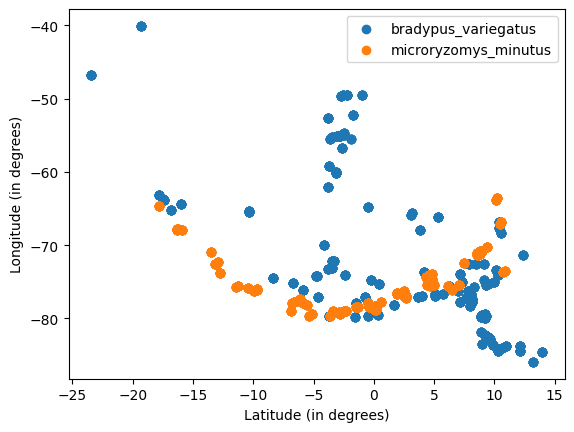

In [105]:
for ul in unique_labels:
  indices = (species_unique == ul)
  plt.scatter(dd_lat[indices], dd_long[indices], label = ul)
plt.legend()

plt.xlabel('Latitude (in degrees)')
plt.ylabel('Longitude (in degrees)')


In [107]:
X = pd.DataFrame({'dd_lat': dd_lat, 'dd_long': dd_long, 'species': species_unique})

# Partial Dependence Plots

## AI Usage

- No AI was used for the code that was written in the notebook. All code has been referred from blog posts or github repositories.